### M5 Walmart retail goods sales forecasting/ demand estimation

* forecast hierarchical sales data from Wal-Mart.
* covers stores in three US States (California, Texas, and Wisconsin) and includes item level, department, product categories, and store details.
* variables include price, promotions, day of the week, and special events.
* “Hierarchical” means that data can be aggregated on different levels: item level, department level, product category level, and state level.
* Jan 2011 to June 2016
* 3049 individual products from 3 categories and 7 departments, sold in 10 stores in 3 states. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
#pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
# Read in the data 'walmart_data/stores.csv'

cal = pd.read_csv('m5-forecasting-accuracy/calendar.csv')
stv = pd.read_csv('m5-forecasting-accuracy/sales_train_validation.csv')
ss = pd.read_csv('m5-forecasting-accuracy/sample_submission.csv')
sellp = pd.read_csv('m5-forecasting-accuracy/sell_prices.csv')

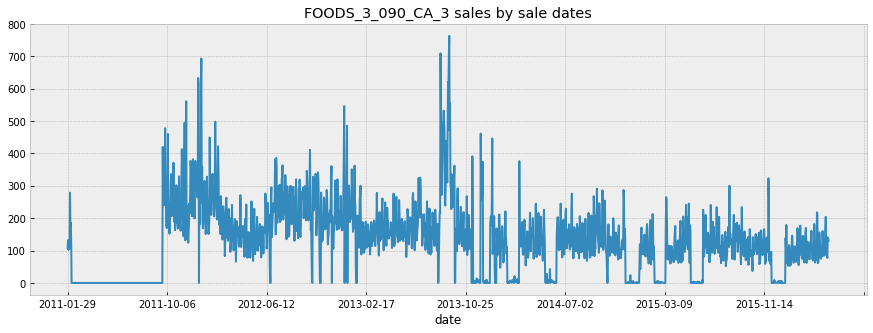

In [3]:
d_cols = [c for c in stv.columns if 'd_' in c] # sales data columns

# Merge calendar on our items' data
example = stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation'][d_cols].T
example = example.rename(columns={8412:'FOODS_3_090_CA_3'}) # Name it correctly
example = example.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example = example.merge(cal, how='left', validate='1:1')
example.set_index('date')['FOODS_3_090_CA_3'] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title='FOODS_3_090_CA_3 sales by sale dates')
plt.show()

# Select more top selling examples
example2 = stv.loc[stv['id'] == 'HOBBIES_1_234_CA_3_validation'][d_cols].T
example2 = example2.rename(columns={6324:'HOBBIES_1_234_CA_3'}) # Name it correctly
example2 = example2.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example2 = example2.merge(cal, how='left', validate='1:1')

example3 = stv.loc[stv['id'] == 'HOUSEHOLD_1_118_CA_3_validation'][d_cols].T
example3 = example3.rename(columns={6776:'HOUSEHOLD_1_118_CA_3'}) # Name it correctly
example3 = example3.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example3 = example3.merge(cal, how='left', validate='1:1')

* It is common to see an item unavailable for a period of time.

<ipython-input-4-5359cf01da89>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('wday').mean()[examples[i]] \
<ipython-input-4-5359cf01da89>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('month').mean()[examples[i]] \
<ipython-input-4-5359cf01da89>:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('year').mean()[examples[i]] \


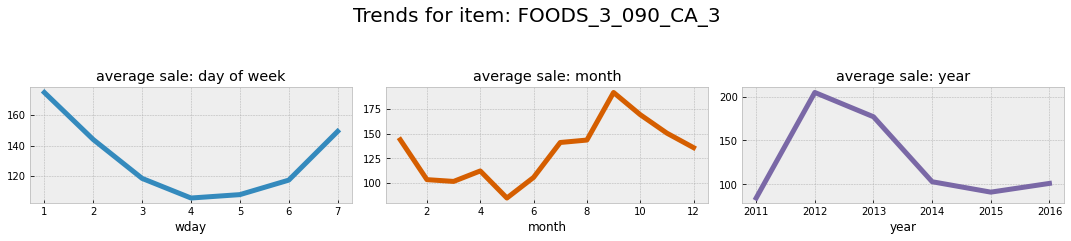

<ipython-input-4-5359cf01da89>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('wday').mean()[examples[i]] \
<ipython-input-4-5359cf01da89>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('month').mean()[examples[i]] \
<ipython-input-4-5359cf01da89>:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('year').mean()[examples[i]] \


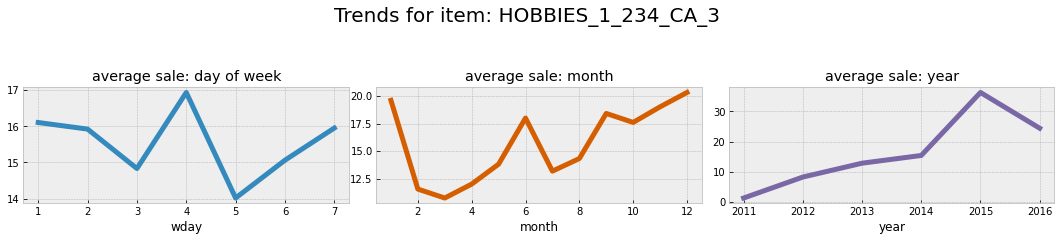

<ipython-input-4-5359cf01da89>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('wday').mean()[examples[i]] \
<ipython-input-4-5359cf01da89>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('month').mean()[examples[i]] \
<ipython-input-4-5359cf01da89>:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('year').mean()[examples[i]] \


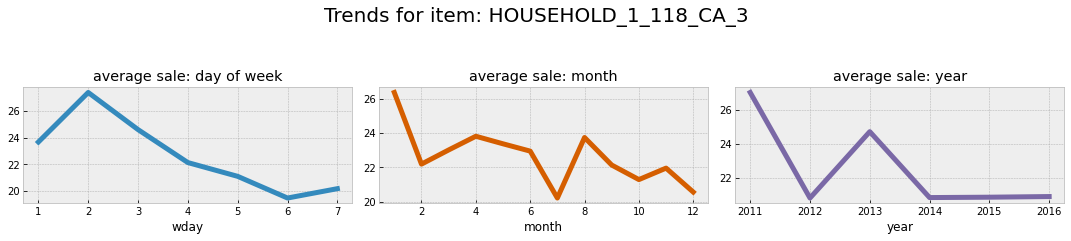

In [4]:
# Sales broken down by time variables

examples = ['FOODS_3_090_CA_3','HOBBIES_1_234_CA_3','HOUSEHOLD_1_118_CA_3']
example_df = [example, example2, example3]
for i in [0, 1, 2]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
    example_df[i].groupby('wday').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale: day of week',
              lw=5,
              color=color_pal[0],
              ax=ax1)
    example_df[i].groupby('month').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale: month',
              lw=5,
              color=color_pal[4],

              ax=ax2)
    example_df[i].groupby('year').mean()[examples[i]] \
        .plot(kind='line',
              lw=5,
              title='average sale: year',
              color=color_pal[2],

              ax=ax3)
    fig.suptitle(f'Trends for item: {examples[i]}',
                 size=20,
                 y=1.1)
    plt.tight_layout()
    plt.show()

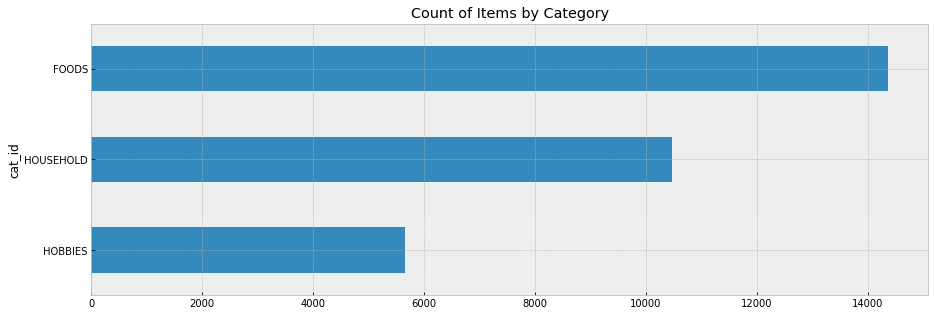

In [5]:
# Combined Sales over Time by Type

stv.groupby('cat_id').count()['id'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title='Count of Items by Category')
plt.show()